### AI Indroduction: Final Project
### Student: Wenping Wang
###  Project Name: Heart Disease Prediction by Machine Learning 
### Professor: Farimasadat Miri
### Durham College

### 1. Loading Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 2. Loading Dataset

In [4]:
df = pd.read_csv(r'C:\Users\benja\PycharmProjects\machinelearning\datasets\heart.csv')


### 3. Analyze Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestPainType   918 non-null    object 
 3   restingBP       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingBS       918 non-null    int64  
 6   restingECG      918 non-null    object 
 7   maxHR           918 non-null    int64  
 8   exerciseAngina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  slope           918 non-null    object 
 11  target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# dataset.isnull().values.any()
display(df.isnull().sum())

age               0
sex               0
chestPainType     0
restingBP         0
cholesterol       0
fastingBS         0
restingECG        0
maxHR             0
exerciseAngina    0
oldpeak           0
slope             0
target            0
dtype: int64

In [7]:
df.head()

,age,sex,chestPainType,restingBP,cholesterol,fastingBS,restingECG,maxHR,exerciseAngina,oldpeak,slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.chestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
df.columns

Index(['age', 'sex', 'chestPainType', 'restingBP', 'cholesterol', 'fastingBS',
       'restingECG', 'maxHR', 'exerciseAngina', 'oldpeak', 'slope', 'target'],
      dtype='object')

In [10]:
columns = ['sex', 'chestPainType','restingECG','exerciseAngina','slope']
for x in columns:
    print("the unique value of column ", x," is" , df[x].unique())


the unique value of column  sex  is ['M' 'F']
the unique value of column  chestPainType  is ['ATA' 'NAP' 'ASY' 'TA']
the unique value of column  restingECG  is ['Normal' 'ST' 'LVH']
the unique value of column  exerciseAngina  is ['N' 'Y']
the unique value of column  slope  is ['Up' 'Flat' 'Down']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestPainType   918 non-null    object 
 3   restingBP       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingBS       918 non-null    int64  
 6   restingECG      918 non-null    object 
 7   maxHR           918 non-null    int64  
 8   exerciseAngina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  slope           918 non-null    object 
 11  target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


C:\Users\benja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


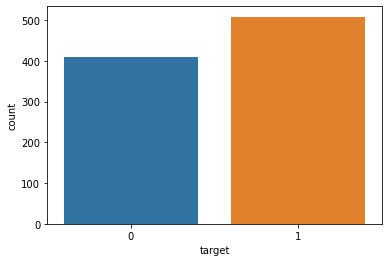

In [13]:
# Count of person with "heart disease" and "without heart disease"
sns.countplot(df['target'])
plt.show()

In [14]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 44.66%
Percentage of Patients Have Heart Disease: 55.34%


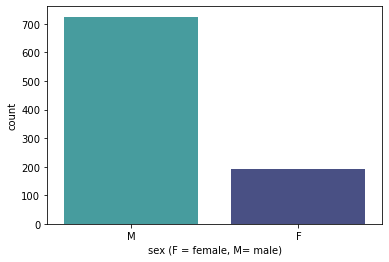

In [15]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("sex (F = female, M= male)")
plt.show()

In [16]:
countFemale = len(df[df.sex == "F"])
countMale = len(df[df.sex == "M"])
print("Percentage of Female Patients: {:.2f}%".format((countFemale/ (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale/ (len(df.sex))*100)))

Percentage of Female Patients: 21.02%
Percentage of Male Patients: 78.98%


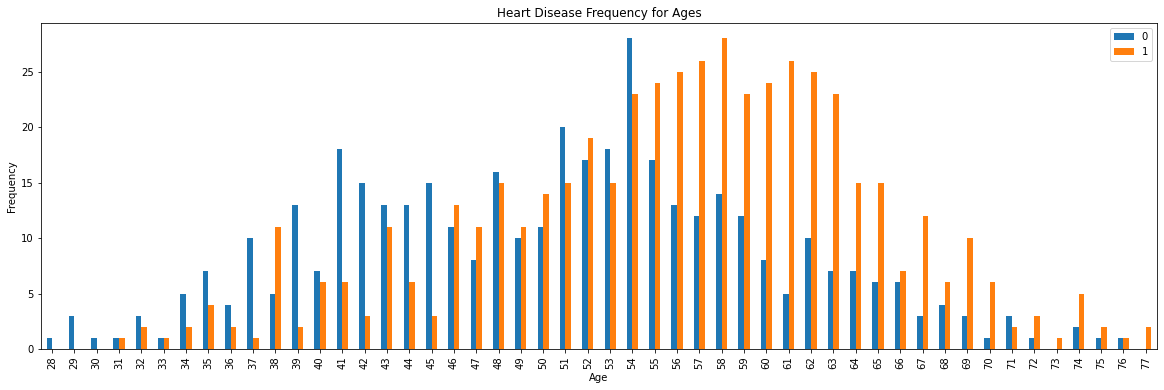

In [17]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('heartDiseaseAndAges.png')
plt.show()

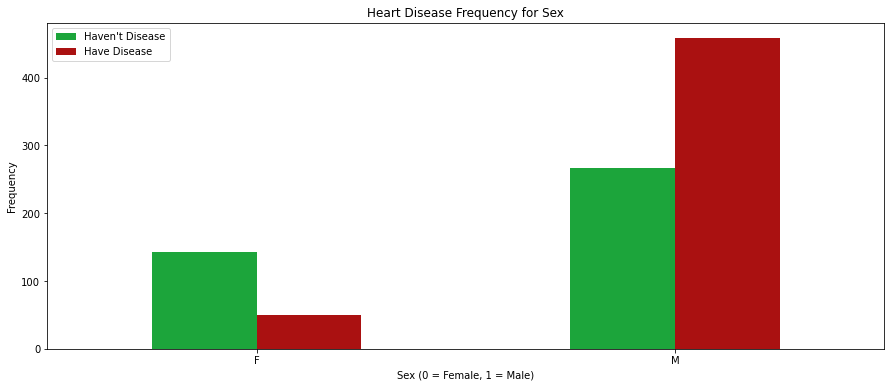

In [18]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [19]:
countFemaleNoHeartDisease = len(df[(df.sex == "F") & (df.target==0)])
# countMale = len(df[df.sex == "M"])
print("Percentage of countFemaleNoHeartDisease Patients:", countFemaleNoHeartDisease)
# print("Percentage of Male Patients: {:.2f}%".format((countMale/ (len(df.sex))*100)))

Percentage of countFemaleNoHeartDisease Patients: 143


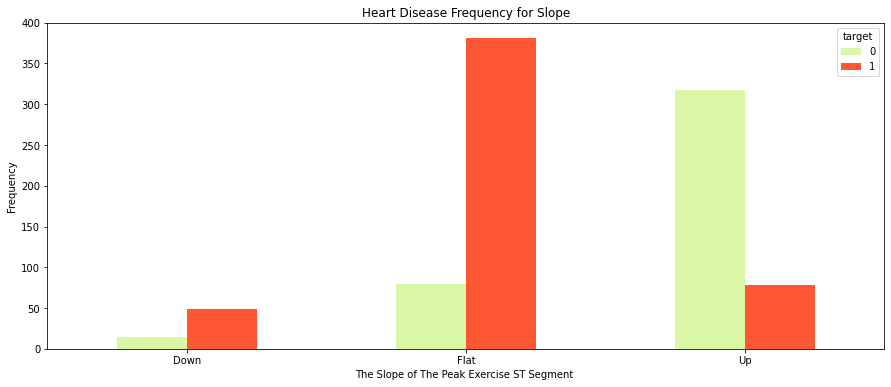

In [20]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

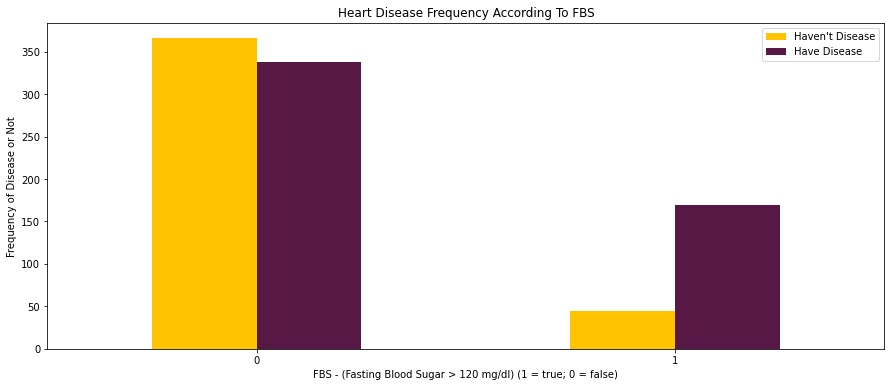

In [21]:
pd.crosstab(df.fastingBS,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

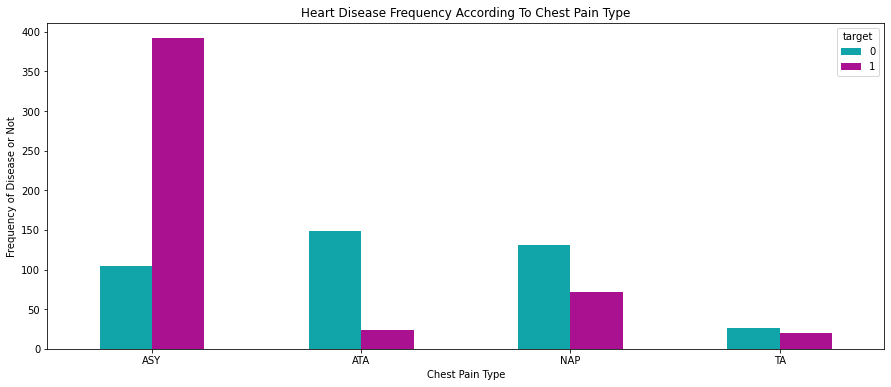

In [22]:
pd.crosstab(df.chestPainType, df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

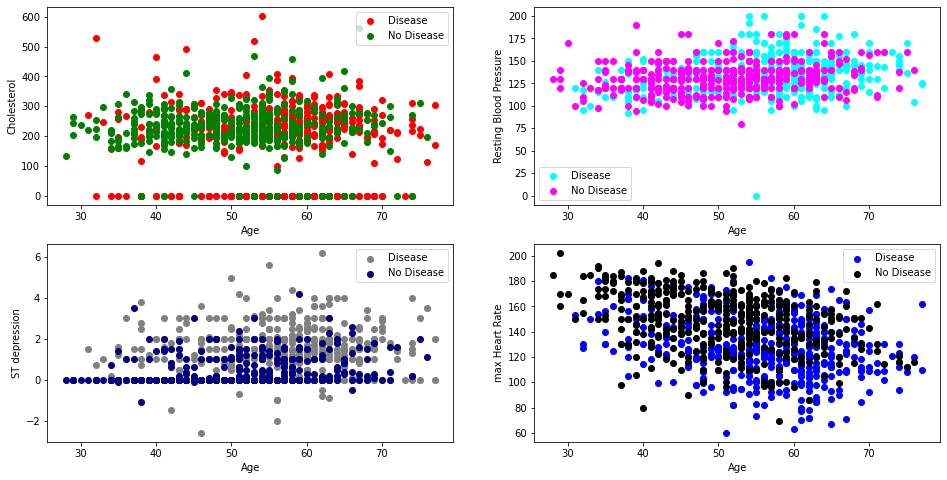

In [23]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.cholesterol [df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.cholesterol [df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.restingBP[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.restingBP[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.maxHR[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.maxHR[df.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('max Heart Rate')
plt.legend(['Disease','No Disease'])




plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestPainType   918 non-null    object 
 3   restingBP       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingBS       918 non-null    int64  
 6   restingECG      918 non-null    object 
 7   maxHR           918 non-null    int64  
 8   exerciseAngina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  slope           918 non-null    object 
 11  target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


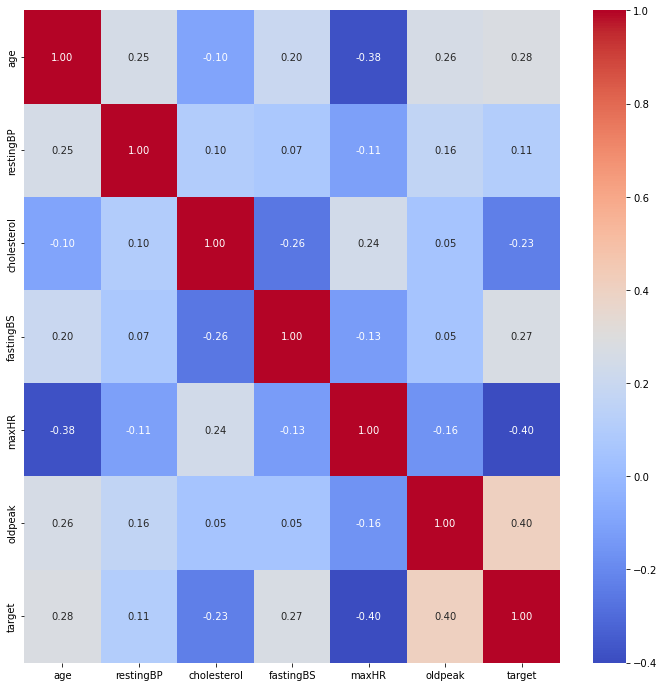

In [25]:
fig, ax = plt.subplots(figsize=(12,12)) 
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

plt.show()

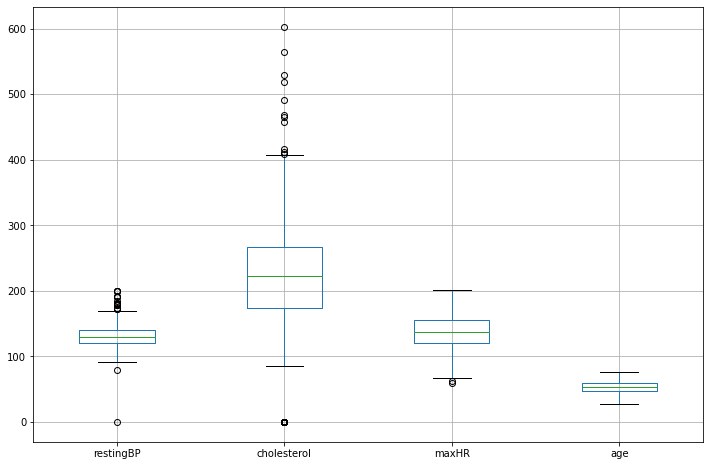

In [26]:
plt.figure(figsize=(12,8))
boxplot = df.boxplot(column=['restingBP', 'cholesterol', 'maxHR','age'])  



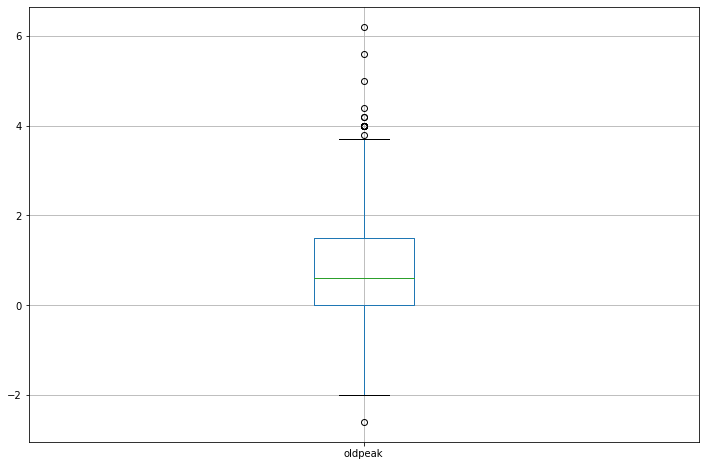

In [27]:
plt.figure(figsize=(12,8))
boxplot = df.boxplot(column=['oldpeak'])  

In [28]:
df.head()

,age,sex,chestPainType,restingBP,cholesterol,fastingBS,restingECG,maxHR,exerciseAngina,oldpeak,slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
df.describe()

,age,restingBP,cholesterol,fastingBS,maxHR,oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 4. Data Cleaing

In [30]:
### replace all the "?" with 0
for x in df.columns:
    df[x] = df[x].replace(['?'],0)
df.describe()   

,age,restingBP,cholesterol,fastingBS,maxHR,oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [31]:
df=df[(df['restingBP']>0) & (df['cholesterol']>0)]


In [32]:
df.describe()

,age,restingBP,cholesterol,fastingBS,maxHR,oldpeak,target
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             746 non-null    int64  
 1   sex             746 non-null    object 
 2   chestPainType   746 non-null    object 
 3   restingBP       746 non-null    int64  
 4   cholesterol     746 non-null    int64  
 5   fastingBS       746 non-null    int64  
 6   restingECG      746 non-null    object 
 7   maxHR           746 non-null    int64  
 8   exerciseAngina  746 non-null    object 
 9   oldpeak         746 non-null    float64
 10  slope           746 non-null    object 
 11  target          746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [34]:
# Data Mapping to digital format

In [35]:
df["sex"]=df["sex"].map({"M":1, "F":0})
df['chestPainType']=df['chestPainType'].map({"ATA":0, "NAP":1, "ASY":2, "NAP":3 })
df['restingECG']=df['restingECG'].map({"Normal":1, "ST":2, "LVH":3})
df['exerciseAngina']=df['exerciseAngina'].map({"N":0, "Y":1})
df['slope']=df['slope'].map({"Up":1, "Flat":2, "Down":3})
df.head()

,age,sex,chestPainType,restingBP,cholesterol,fastingBS,restingECG,maxHR,exerciseAngina,oldpeak,slope,target
0,40,1,0.0,140,289,0,1,172,0,0.0,1,0
1,49,0,3.0,160,180,0,1,156,0,1.0,2,1
2,37,1,0.0,130,283,0,2,98,0,0.0,1,0
3,48,0,2.0,138,214,0,1,108,1,1.5,2,1
4,54,1,3.0,150,195,0,1,122,0,0.0,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             746 non-null    int64  
 1   sex             746 non-null    int64  
 2   chestPainType   705 non-null    float64
 3   restingBP       746 non-null    int64  
 4   cholesterol     746 non-null    int64  
 5   fastingBS       746 non-null    int64  
 6   restingECG      746 non-null    int64  
 7   maxHR           746 non-null    int64  
 8   exerciseAngina  746 non-null    int64  
 9   oldpeak         746 non-null    float64
 10  slope           746 non-null    int64  
 11  target          746 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 75.8 KB


In [37]:
# Creating Dummy Variable

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [38]:
a = pd.get_dummies(df['chestPainType'], prefix = "cp")
b = pd.get_dummies(df['slope'], prefix = "slope")

print(a)

     cp_0.0  cp_2.0  cp_3.0
0         1       0       0
1         0       0       1
2         1       0       0
3         0       1       0
4         0       0       1
..      ...     ...     ...
913       0       0       0
914       0       1       0
915       0       1       0
916       1       0       0
917       0       0       1

[746 rows x 3 columns]


In [39]:
frames = [df, a, b]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,chestPainType,restingBP,cholesterol,fastingBS,restingECG,maxHR,exerciseAngina,oldpeak,slope,target,cp_0.0,cp_2.0,cp_3.0,slope_1,slope_2,slope_3
0,40,1,0.0,140,289,0,1,172,0,0.0,1,0,1,0,0,1,0,0
1,49,0,3.0,160,180,0,1,156,0,1.0,2,1,0,0,1,0,1,0
2,37,1,0.0,130,283,0,2,98,0,0.0,1,0,1,0,0,1,0,0
3,48,0,2.0,138,214,0,1,108,1,1.5,2,1,0,1,0,0,1,0
4,54,1,3.0,150,195,0,1,122,0,0.0,1,0,0,0,1,1,0,0


In [40]:
df = df.drop(columns = ['chestPainType', 'slope'])
df.head()

,age,sex,restingBP,cholesterol,fastingBS,restingECG,maxHR,exerciseAngina,oldpeak,target,cp_0.0,cp_2.0,cp_3.0,slope_1,slope_2,slope_3
0,40,1,140,289,0,1,172,0,0.0,0,1,0,0,1,0,0
1,49,0,160,180,0,1,156,0,1.0,1,0,0,1,0,1,0
2,37,1,130,283,0,2,98,0,0.0,0,1,0,0,1,0,0
3,48,0,138,214,0,1,108,1,1.5,1,0,1,0,0,1,0
4,54,1,150,195,0,1,122,0,0.0,0,0,0,1,1,0,0


### 5  Evaluate the model

### 5.1 Split the data to training and testing

In [41]:
from sklearn.utils import shuffle
df = shuffle(df)

In [42]:
# Creat dataset for split
X = df.drop(['target'], axis = 1)
y = df.target.values
df.target[0:10]
df.target.shape
type(df.target)

pandas.core.series.Series

In [43]:
# mean = X.mean(axis=0)
# diff = X -mean
# std = X.std(axis=0)
# zscore = diff/std
# X = zscore
# X

In [44]:
# Standard the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X

array([[-1.67187886, -1.76036959, -0.17501939, ...,  1.06655324,
        -0.95029534, -0.24731848],
       [-1.56661032, -1.76036959, -0.75401921, ...,  1.06655324,
        -0.95029534, -0.24731848],
       [ 1.38090872,  0.56806253, -1.33301904, ..., -0.9375997 ,
         1.05230444, -0.24731848],
       ...,
       [ 1.27564018,  0.56806253,  0.17238051, ..., -0.9375997 ,
        -0.95029534,  4.04336954],
       [ 0.22295481,  0.56806253,  0.40398044, ...,  1.06655324,
        -0.95029534, -0.24731848],
       [ 0.11768627,  0.56806253,  1.5619801 , ...,  1.06655324,
        -0.95029534, -0.24731848]])

In [128]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3)

In [46]:
print(len(y_train))

596


In [70]:
# accuracies = {}

# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# acc = lr.score(X_test,y_test)*100
# predictions=lr.predict(X_test)
# accuracies['Logistic Regression'] = acc
# print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 83.33%


In [71]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,  KFold

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [131]:
test_size = 0.3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.87 (0.02)
LDA: 0.86 (0.02)
KNN: 0.86 (0.03)
NB: 0.85 (0.02)


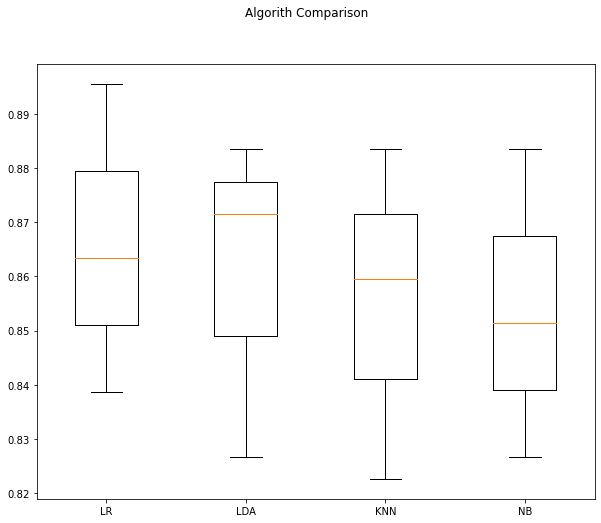

In [132]:

fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [136]:
accuracies = {}
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

predictions=lr.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.85


In [135]:
from sklearn.metrics import classification_report


print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       112
           1       0.84      0.87      0.85       112

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.85      0.85      0.85       224



### 5.2 Machine learning model

In [ ]:
X_val = X_train[:276]
partial_X_train = X_train[276:]
y_val = y_train[:276]
partial_y_train = y_train[276:]

In [ ]:
partial_X_train.shape

In [ ]:
X_test.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
import warnings

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(15,)))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',

loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_X_train,
partial_y_train,
epochs=30,
batch_size=16,
validation_data=(X_val, y_val))

In [ ]:
type(history)

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf() # clear figure
plt.figure(figsize=(10,5))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Re-train the model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(15,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(partial_X_train,
partial_y_train,
epochs=20,
batch_size=16,
validation_data=(X_val, y_val))


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf() # clear figure
plt.figure(figsize=(10,5))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print("Model lose {:.2f}%".format(results[0]*100), "Model Accuracy {:.2f}%".format(results[1]*100))

### 6. Result

####  Two models were accessed to predict heart disease problems. logistic regressions model achieved 87% of accuracy while 
neural networks reached 88% accuracy. Both models can predict heart disease with relatively high accuracy with a small 
dataset:

Reference:
https://www150.statcan.gc.ca/n1/daily-quotidien/220124/dq220124a-eng.htm
Francois Chollet, Deep Learning with Python'''
